# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

weather_api_key = "c22ee453254965d28d806869bb29a17d"
units = "metric"  # or "imperial" for Fahrenheit

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narok
Processing Record 2 of Set 1 | tucurui
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | magadan
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | mount pearl
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | lusambo
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | usogorsk
Processing Record 15 of Set 1 | arkhangel'sk
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | khon kaen
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | udhampur
Processing Record 23 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()


NameError: name 'city_data' is not defined

In [12]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taoudenni,22.6783,-3.9836,39.04,7,0,7.79,ML,1712845857
1,blackmans bay,-43.0167,147.3167,9.18,84,100,0.45,AU,1712845852
2,touros,-5.1989,-35.4608,30.03,70,65,3.38,BR,1712845894
3,vorgashor,67.5833,63.9500,-12.33,82,100,11.07,RU,1712845894
4,ilulissat,69.2167,-51.1000,-4.99,63,100,2.06,GL,1712845865


In [15]:
import os
# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taoudenni,22.6783,-3.9836,39.04,7,0,7.79,ML,1712845857
1,blackmans bay,-43.0167,147.3167,9.18,84,100,0.45,AU,1712845852
2,touros,-5.1989,-35.4608,30.03,70,65,3.38,BR,1712845894
3,vorgashor,67.5833,63.9500,-12.33,82,100,11.07,RU,1712845894
4,ilulissat,69.2167,-51.1000,-4.99,63,100,2.06,GL,1712845865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

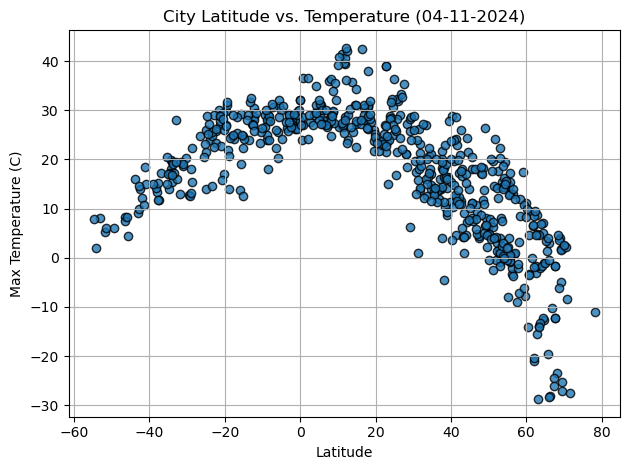

In [32]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

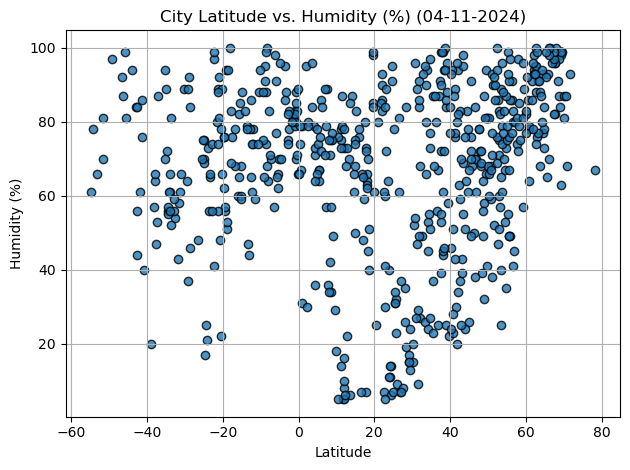

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

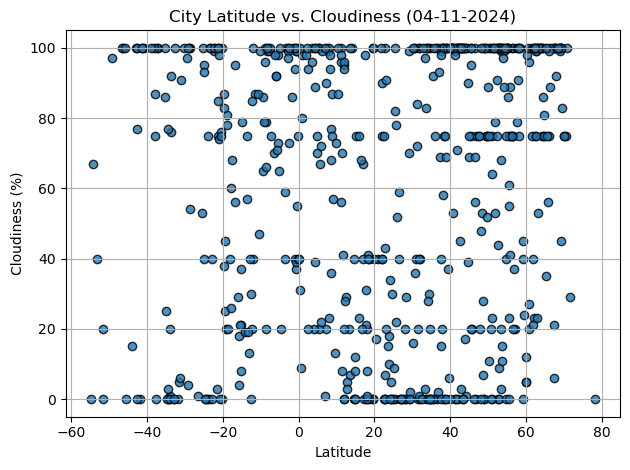

In [31]:

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.8, edgecolors="k")

# Format date from UTC to m/d/y
date = datetime.now().strftime("%m-%d-%Y")

# Set the labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Add grid lines
plt.grid(True) 

# Ensure tight layout
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Display the plot
plt.show()


#### Latitude vs. Wind Speed Plot

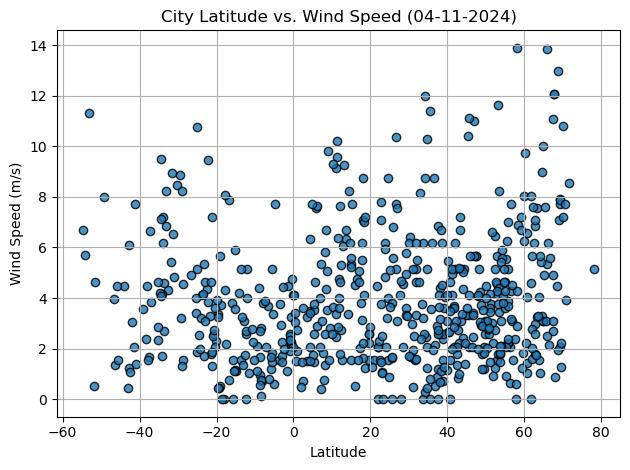

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taoudenni,22.6783,-3.9836,39.04,7,0,7.79,ML,1712845857
3,vorgashor,67.5833,63.9500,-12.33,82,100,11.07,RU,1712845894
4,ilulissat,69.2167,-51.1000,-4.99,63,100,2.06,GL,1712845865
6,ramos arizpe,25.5500,-100.9667,16.86,31,0,0.00,MX,1712846031
7,la passe,45.5549,-0.8967,18.13,76,95,3.31,FR,1712846104


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,9.18,84,100,0.45,AU,1712845852
2,touros,-5.1989,-35.4608,30.03,70,65,3.38,BR,1712845894
5,edinburgh of the seven seas,-37.0676,-12.3116,17.26,87,100,3.84,SH,1712845866
9,waitangi,-43.9535,-176.5597,16.01,94,15,4.47,NZ,1712845855
12,invercargill,-46.4000,168.3500,8.34,87,100,1.34,NZ,1712845854


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8361913459161829
-----------------------------------
Observations about linear relationship:
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases.


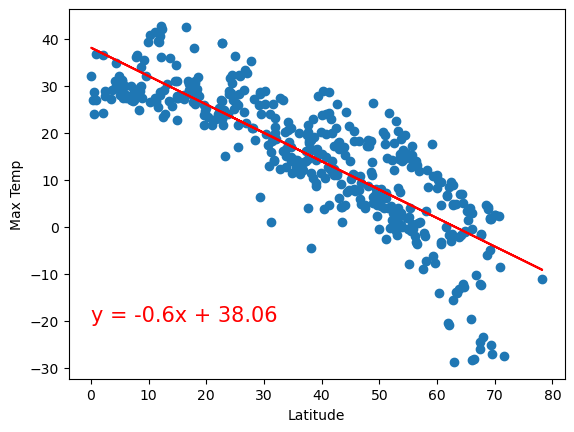

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a negative relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")
print("As you move away from the equator, the max temperature decreases.")


The r-value is 0.8178147166411681
-----------------------------------
Observations about linear relationship:
The regression displays a sligtly positive relationship between temperature and latitude.
In the southern hemisphere, as the latitude increases the distance from the equator decreases
As you move closer to the equator, the max temperature generally increases.


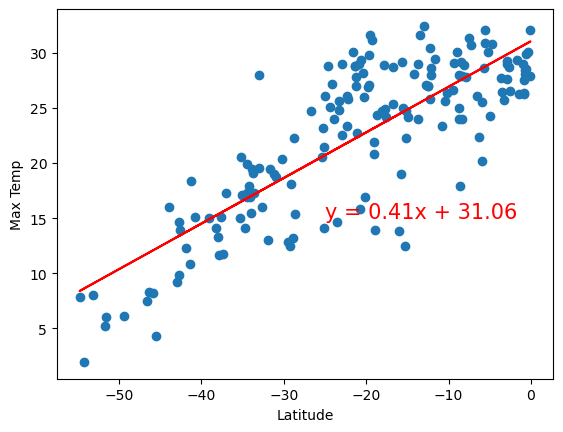

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a sligtly positive relationship between temperature and latitude.")
print("In the southern hemisphere, as the latitude increases the distance from the equator decreases")
print("As you move closer to the equator, the max temperature generally increases.")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.34773801161635726
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.


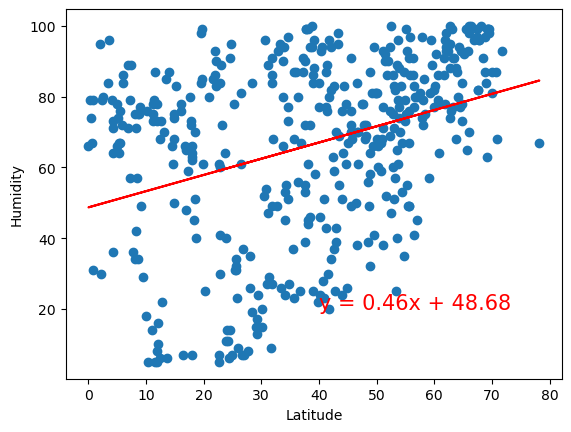

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.")


The r-value is 0.21636771239821925
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive.
Humidity increases as cities get closer to the equator.


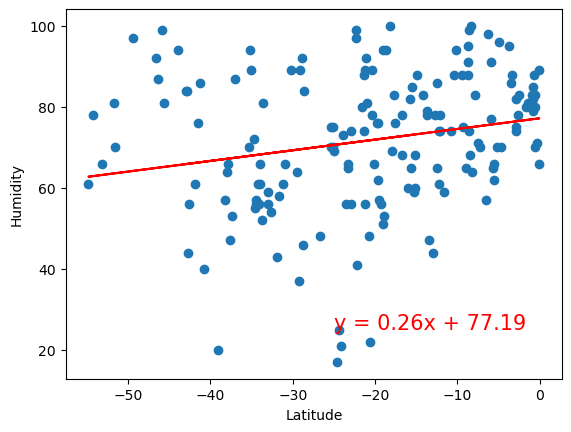

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive.")
print("Humidity increases as cities get closer to the equator.")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.19709740867098732
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


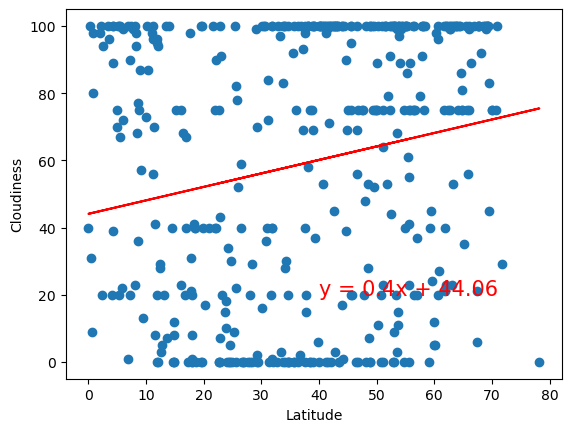

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")


The r-value is 0.1956307483882481
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


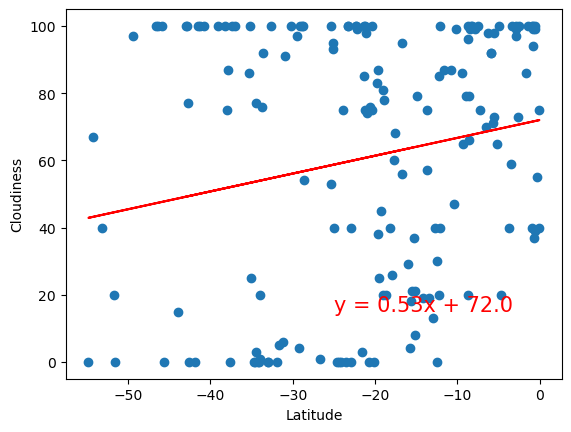

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.11011487694381197
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


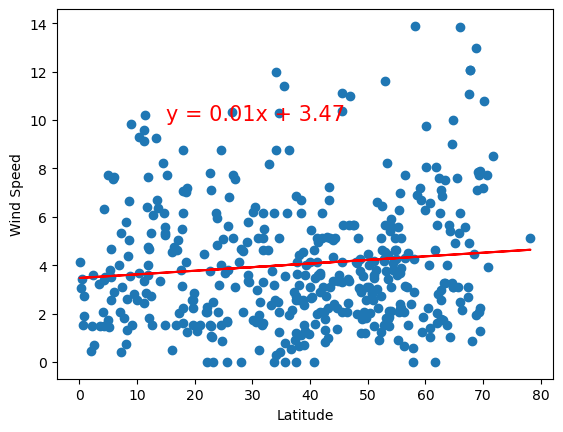

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")


The r-value is -0.33973152190793643
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


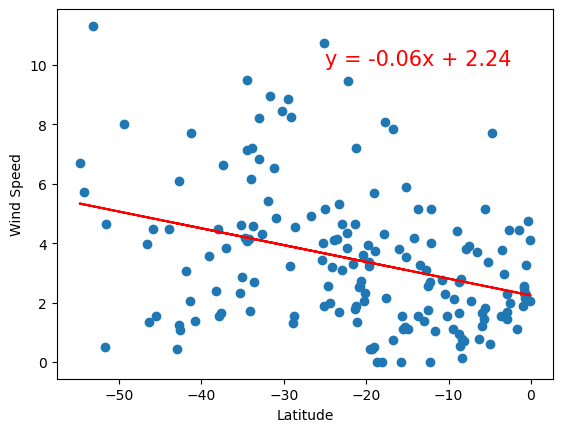

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")


**Discussion about the linear relationship:** YOUR RESPONSE HERE